In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN, zadehN, lukasiewiczN, drasticN, einsteinN, fodorN, tnorm
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych<H1>

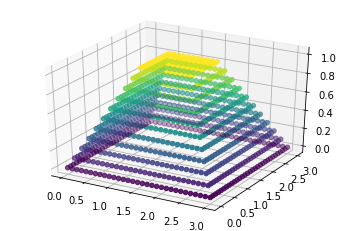

In [2]:
x = np.arange(0, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY = np.column_stack((dataX,dataY))

data_labels = []
for x, y in zip(dataX, dataY):
    x-=1.5
    y-=1.5
    data_labels.append( abs(x) if (y<x and y>-x) or (y>x and y<-x)  else abs(y) ) 
data_labels=np.array(data_labels)
#data_labels[data_labels>1.5] = 1.5
data_labels=abs(data_labels-1.5)
data_labels[data_labels>1] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataX, dataY, data_labels, c=data_labels)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

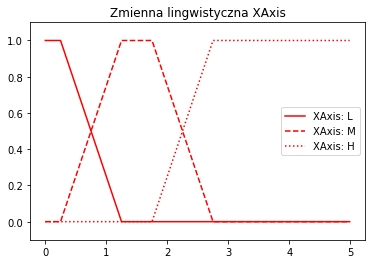

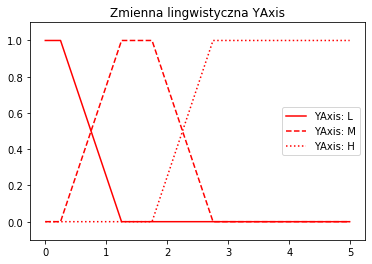

In [3]:
varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.show()

<H1>Uczenie systemu ANFIS</H1>

basinhopping step 0: f 88.2245
basinhopping step 1: f 31.1326 trial_f 31.1326 accepted 1  lowest_f 31.1326
found new global minimum on step 1 with function value 31.1326
basinhopping step 2: f 28.5614 trial_f 28.5614 accepted 1  lowest_f 28.5614
found new global minimum on step 2 with function value 28.5614
basinhopping step 3: f 28.5573 trial_f 28.5573 accepted 1  lowest_f 28.5573
found new global minimum on step 3 with function value 28.5573
basinhopping step 4: f 28.5573 trial_f 85.1478 accepted 0  lowest_f 28.5573
basinhopping step 5: f 28.5573 trial_f 31.7081 accepted 0  lowest_f 28.5573
basinhopping step 6: f 28.5573 trial_f 85.1486 accepted 0  lowest_f 28.5573
basinhopping step 7: f 28.5573 trial_f 85.1492 accepted 0  lowest_f 28.5573
basinhopping step 8: f 28.5558 trial_f 28.5558 accepted 1  lowest_f 28.5558
found new global minimum on step 8 with function value 28.5558
basinhopping step 9: f 28.556 trial_f 28.556 accepted 1  lowest_f 28.5558
basinhopping step 10: f 28.5527 tri

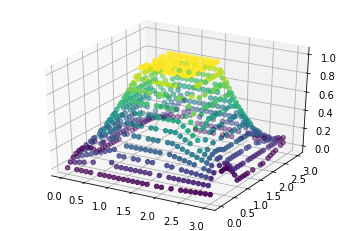

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

start = time.time()
fis.train(True, True, False, True, n_iter=100) #true- optymalizacja globalna,czy optymalizujemy przesłanki, czy operator, czy konkluzej
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

<H1>Zadanie</H1>

Zaimplementuj wszystkie operatory rozmyte pokazane w pliku "Najczęściej stosowane t-normy". Następnie użyj ich do uczenia powyższego systemu ANFIS, która z nich jest najlepsza, jak myślisz dlaczego?

In [5]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [6]:
%matplotlib inline

basinhopping step 0: f 195.601
basinhopping step 1: f 195.634 trial_f 195.634 accepted 1  lowest_f 195.601
basinhopping step 2: f 167.724 trial_f 167.724 accepted 1  lowest_f 167.724
found new global minimum on step 2 with function value 167.724
basinhopping step 3: f 167.724 trial_f 180.8 accepted 0  lowest_f 167.724
basinhopping step 4: f 109.094 trial_f 109.094 accepted 1  lowest_f 109.094
found new global minimum on step 4 with function value 109.094
basinhopping step 5: f 89.9236 trial_f 89.9236 accepted 1  lowest_f 89.9236
found new global minimum on step 5 with function value 89.9236
basinhopping step 6: f 91.2988 trial_f 91.2988 accepted 1  lowest_f 89.9236
basinhopping step 7: f 25.6687 trial_f 25.6687 accepted 1  lowest_f 25.6687
found new global minimum on step 7 with function value 25.6687
basinhopping step 8: f 25.6686 trial_f 25.6686 accepted 1  lowest_f 25.6686
found new global minimum on step 8 with function value 25.6686
basinhopping step 9: f 25.4462 trial_f 25.4462 a

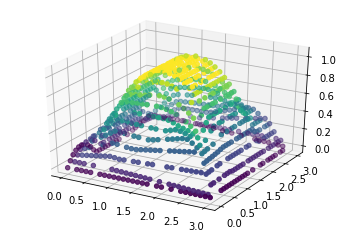

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function = zadehN)

start = time.time()
fis.train(True, True, False, True, n_iter=100) #true- optymalizacja globalna,czy optymalizujemy przesłanki, czy operator, czy konkluzej
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

basinhopping step 0: f 152.791
basinhopping step 1: f 138.508 trial_f 138.508 accepted 1  lowest_f 138.508
found new global minimum on step 1 with function value 138.508
basinhopping step 2: f 138.505 trial_f 138.505 accepted 1  lowest_f 138.505
found new global minimum on step 2 with function value 138.505
basinhopping step 3: f 61.3806 trial_f 61.3806 accepted 1  lowest_f 61.3806
found new global minimum on step 3 with function value 61.3806
basinhopping step 4: f 61.3806 trial_f 199.7 accepted 0  lowest_f 61.3806
basinhopping step 5: f 52.769 trial_f 52.769 accepted 1  lowest_f 52.769
found new global minimum on step 5 with function value 52.769
basinhopping step 6: f 52.769 trial_f 99.0502 accepted 0  lowest_f 52.769
basinhopping step 7: f 52.769 trial_f 199.7 accepted 0  lowest_f 52.769
basinhopping step 8: f 52.769 trial_f 77.4889 accepted 0  lowest_f 52.769
basinhopping step 9: f 52.769 trial_f 55.4278 accepted 0  lowest_f 52.769
basinhopping step 10: f 52.769 trial_f 119.133 ac

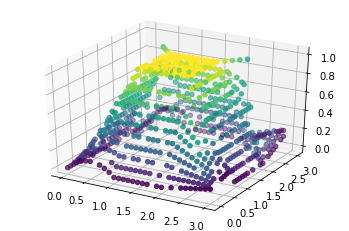

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function = lukasiewiczN)

start = time.time()
fis.train(True, True, False, True, n_iter=100) #true- optymalizacja globalna,czy optymalizujemy przesłanki, czy operator, czy konkluzej
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

basinhopping step 0: f 95.1485
basinhopping step 1: f 85.5829 trial_f 85.5829 accepted 1  lowest_f 85.5829
found new global minimum on step 1 with function value 85.5829
basinhopping step 2: f 33.2947 trial_f 33.2947 accepted 1  lowest_f 33.2947
found new global minimum on step 2 with function value 33.2947
basinhopping step 3: f 33.2947 trial_f 90.3137 accepted 0  lowest_f 33.2947
basinhopping step 4: f 33.2945 trial_f 33.2945 accepted 1  lowest_f 33.2945
found new global minimum on step 4 with function value 33.2945
basinhopping step 5: f 33.1718 trial_f 33.1718 accepted 1  lowest_f 33.1718
found new global minimum on step 5 with function value 33.1718
basinhopping step 6: f 33.2944 trial_f 33.2944 accepted 1  lowest_f 33.1718
basinhopping step 7: f 33.2944 trial_f 87.5821 accepted 0  lowest_f 33.1718
basinhopping step 8: f 33.3881 trial_f 33.3881 accepted 1  lowest_f 33.1718
basinhopping step 9: f 33.2949 trial_f 33.2949 accepted 1  lowest_f 33.1718
basinhopping step 10: f 33.2943 t

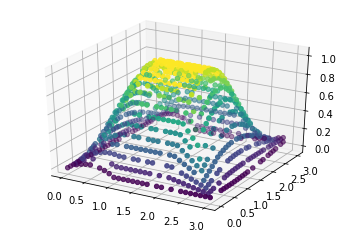

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, einsteinN)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

basinhopping step 0: f 211.232
basinhopping step 1: f 186 trial_f 186 accepted 1  lowest_f 186
found new global minimum on step 1 with function value 186
basinhopping step 2: f 186 trial_f 186.65 accepted 0  lowest_f 186
basinhopping step 3: f 186 trial_f 186 accepted 1  lowest_f 186
basinhopping step 4: f 138.505 trial_f 138.505 accepted 1  lowest_f 138.505
found new global minimum on step 4 with function value 138.505
basinhopping step 5: f 138.505 trial_f 138.505 accepted 1  lowest_f 138.505
basinhopping step 6: f 138.506 trial_f 138.506 accepted 1  lowest_f 138.505
basinhopping step 7: f 138.505 trial_f 138.505 accepted 1  lowest_f 138.505
found new global minimum on step 7 with function value 138.505
basinhopping step 8: f 138.505 trial_f 138.505 accepted 1  lowest_f 138.505
basinhopping step 9: f 138.505 trial_f 210.5 accepted 0  lowest_f 138.505
basinhopping step 10: f 138.505 trial_f 138.505 accepted 1  lowest_f 138.505
basinhopping step 11: f 138.505 trial_f 210.51 accepted 0 

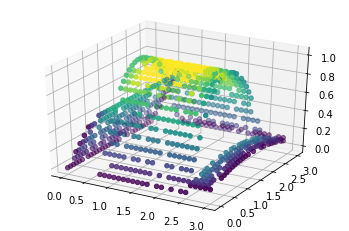

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, drasticN)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

basinhopping step 0: f 964.717
basinhopping step 1: f 95.1218 trial_f 95.1218 accepted 1  lowest_f 95.1218
found new global minimum on step 1 with function value 95.1218
basinhopping step 2: f 96.3603 trial_f 96.3603 accepted 1  lowest_f 95.1218
basinhopping step 3: f 96.3603 trial_f 195.3 accepted 0  lowest_f 95.1218
basinhopping step 4: f 92.1911 trial_f 92.1911 accepted 1  lowest_f 92.1911
found new global minimum on step 4 with function value 92.1911
basinhopping step 5: f 92.1911 trial_f 109.981 accepted 0  lowest_f 92.1911
basinhopping step 6: f 92.4644 trial_f 92.4644 accepted 1  lowest_f 92.1911
basinhopping step 7: f 57.8659 trial_f 57.8659 accepted 1  lowest_f 57.8659
found new global minimum on step 7 with function value 57.8659
basinhopping step 8: f 57.8659 trial_f 58.6288 accepted 0  lowest_f 57.8659
basinhopping step 9: f 57.8659 trial_f 96.0862 accepted 0  lowest_f 57.8659
basinhopping step 10: f 57.8659 trial_f 101.651 accepted 0  lowest_f 57.8659
basinhopping step 11:

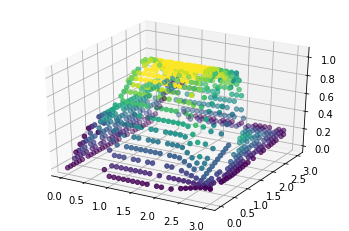

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, fodorN)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

basinhopping step 0: f 138.381
basinhopping step 1: f 138.301 trial_f 138.301 accepted 1  lowest_f 138.301
found new global minimum on step 1 with function value 138.301
basinhopping step 2: f 133.828 trial_f 133.828 accepted 1  lowest_f 133.828
found new global minimum on step 2 with function value 133.828
basinhopping step 3: f 133.828 trial_f 138.518 accepted 0  lowest_f 133.828
basinhopping step 4: f 89.0715 trial_f 89.0715 accepted 1  lowest_f 89.0715
found new global minimum on step 4 with function value 89.0715
basinhopping step 5: f 89.0715 trial_f 109.833 accepted 0  lowest_f 89.0715
basinhopping step 6: f 89.0715 trial_f 97.2526 accepted 0  lowest_f 89.0715
basinhopping step 7: f 88.025 trial_f 88.025 accepted 1  lowest_f 88.025
found new global minimum on step 7 with function value 88.025
basinhopping step 8: f 25.4271 trial_f 25.4271 accepted 1  lowest_f 25.4271
found new global minimum on step 8 with function value 25.4271
basinhopping step 9: f 24.4602 trial_f 24.4602 acc

basinhopping step 88: f 25.3429 trial_f 25.3429 accepted 1  lowest_f 23.9873
basinhopping step 89: f 25.4434 trial_f 25.4434 accepted 1  lowest_f 23.9873
basinhopping step 90: f 25.5551 trial_f 25.5551 accepted 1  lowest_f 23.9873
basinhopping step 91: f 25.3562 trial_f 25.3562 accepted 1  lowest_f 23.9873
basinhopping step 92: f 25.3445 trial_f 25.3445 accepted 1  lowest_f 23.9873
basinhopping step 93: f 25.3445 trial_f 26.0762 accepted 0  lowest_f 23.9873
basinhopping step 94: f 25.3445 trial_f 134.601 accepted 0  lowest_f 23.9873
basinhopping step 95: f 25.3445 trial_f 143.393 accepted 0  lowest_f 23.9873
basinhopping step 96: f 7.07999 trial_f 7.07999 accepted 1  lowest_f 7.07999
found new global minimum on step 96 with function value 7.07999
basinhopping step 97: f 7.07999 trial_f 29.8891 accepted 0  lowest_f 7.07999
basinhopping step 98: f 7.07999 trial_f 7.7687 accepted 0  lowest_f 7.07999
basinhopping step 99: f 7.07999 trial_f 26.1855 accepted 0  lowest_f 7.07999
adaptive step

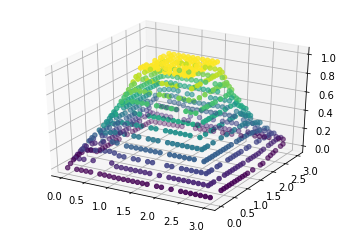

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function = tnorm)

start = time.time()
fis.train(True, True, True, True, n_iter=100) #true- optymalizacja globalna,czy optymalizujemy przesłanki, czy operator, czy konkluzej
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [0]:
fis.op